# Imports

In [339]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import f1_score

# Question 3 - Combining PCA and K-Means Clustering via ANNs

In [3]:
# import the data
customer_df = pd.read_csv('data.csv')

In [4]:
customer_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [5]:
# drop ID column as it is not an explanatory feature
customer_df = customer_df.drop(['ID'], axis=1)

In [6]:
customer_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


## Initial EDA

In [8]:
# We are in the multivariate case, hence use pair plot

In [346]:
df_summary = customer_df.describe()
df_summary

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [347]:
print(df_summary.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &          Sex &  Marital status &          Age &   Education &         Income &   Occupation &  Settlement size \\
\midrule
count &  2000.000000 &     2000.000000 &  2000.000000 &  2000.00000 &    2000.000000 &  2000.000000 &      2000.000000 \\
mean  &     0.457000 &        0.496500 &    35.909000 &     1.03800 &  120954.419000 &     0.810500 &         0.739000 \\
std   &     0.498272 &        0.500113 &    11.719402 &     0.59978 &   38108.824679 &     0.638587 &         0.812533 \\
min   &     0.000000 &        0.000000 &    18.000000 &     0.00000 &   35832.000000 &     0.000000 &         0.000000 \\
25\%   &     0.000000 &        0.000000 &    27.000000 &     1.00000 &   97663.250000 &     0.000000 &         0.000000 \\
50\%   &     0.000000 &        0.000000 &    33.000000 &     1.00000 &  115548.500000 &     1.000000 &         1.000000 \\
75\%   &     1.000000 &        1.000000 &    42.000000 &     1.00000 &  138072.250000 &     1.000000 & 

C:\Users\Armand\AppData\Local\Temp\ipykernel_10260\1595586375.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_summary.to_latex())


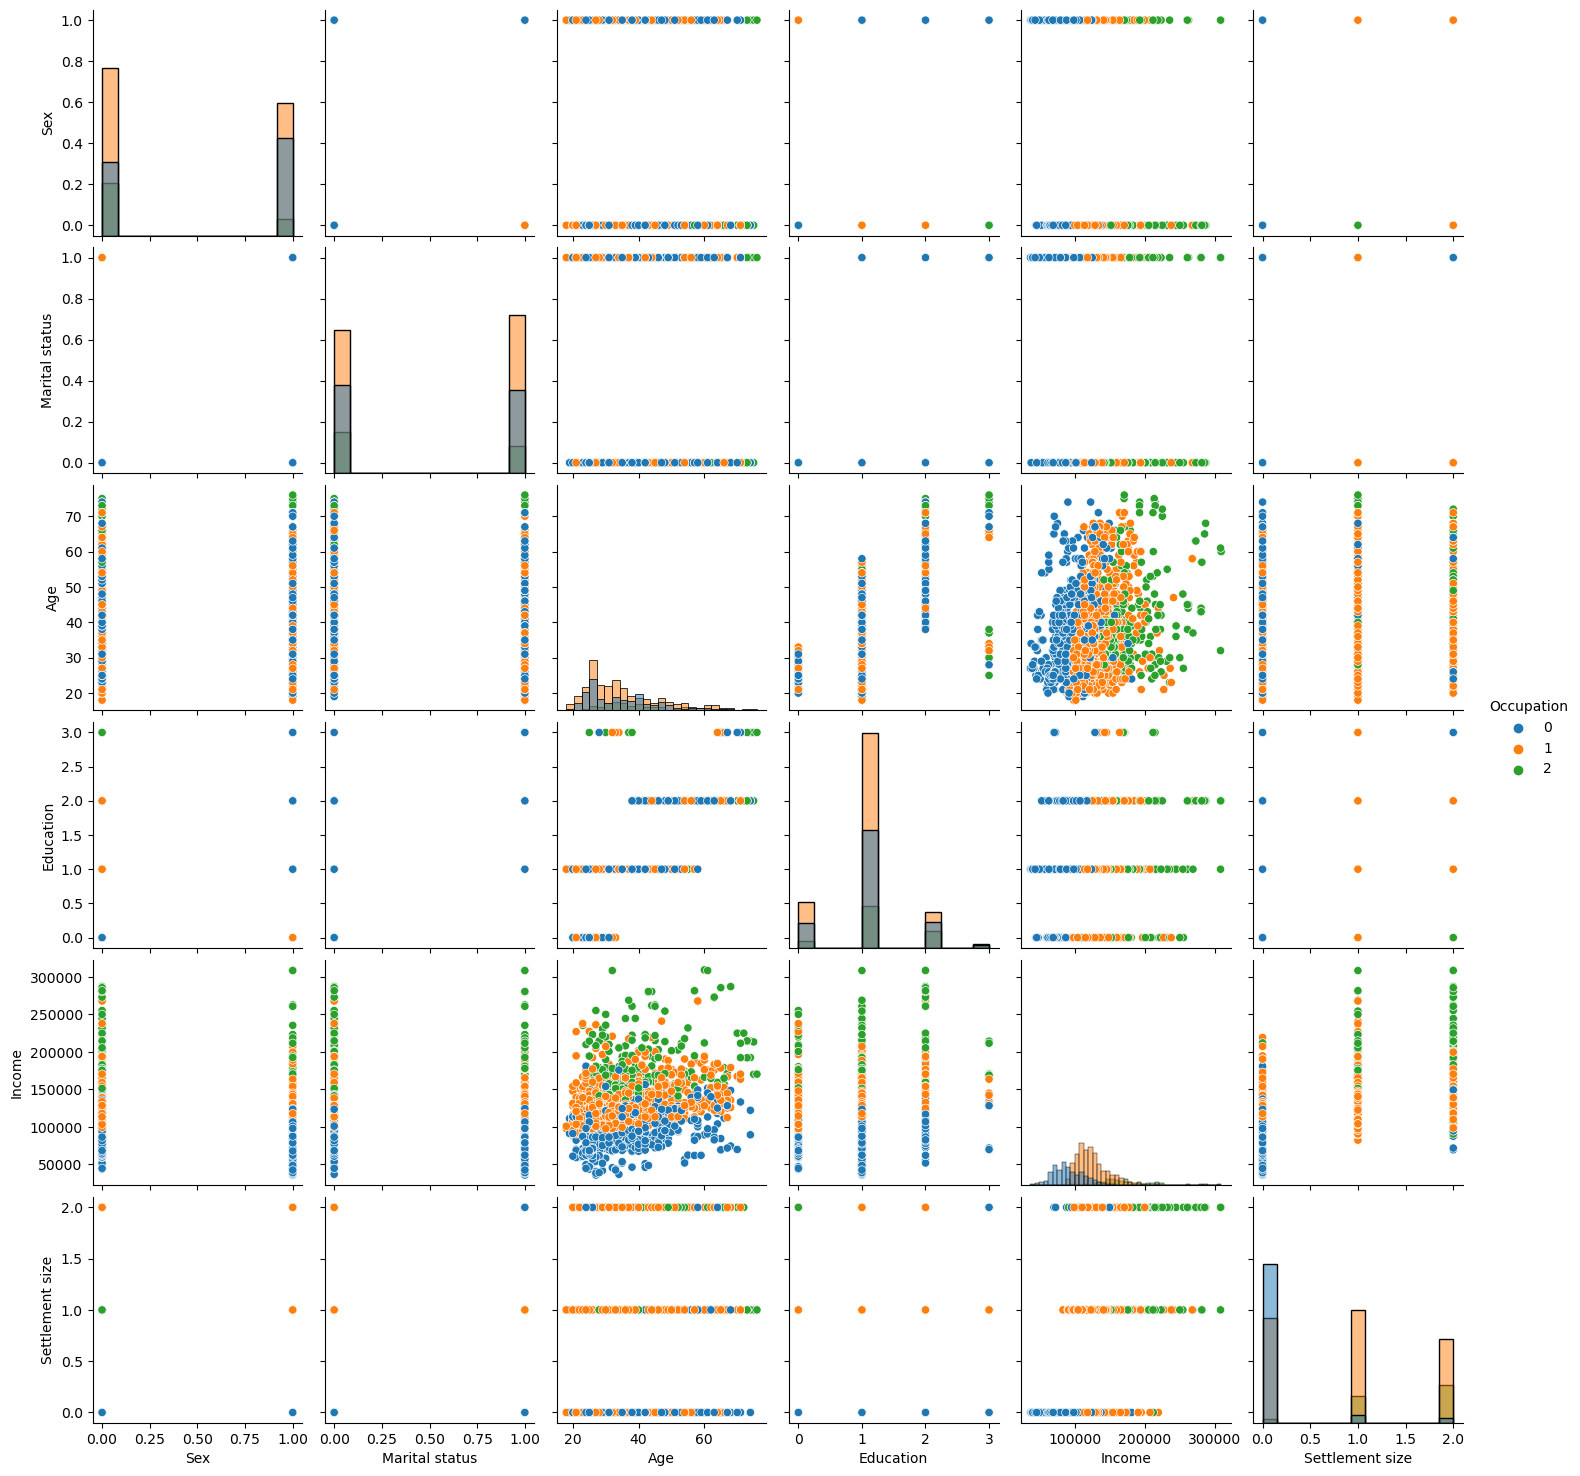

In [12]:
# hue=occupation
seaborn.pairplot(customer_df, hue='Occupation', palette='tab10', diag_kind='hist')
plt.show()

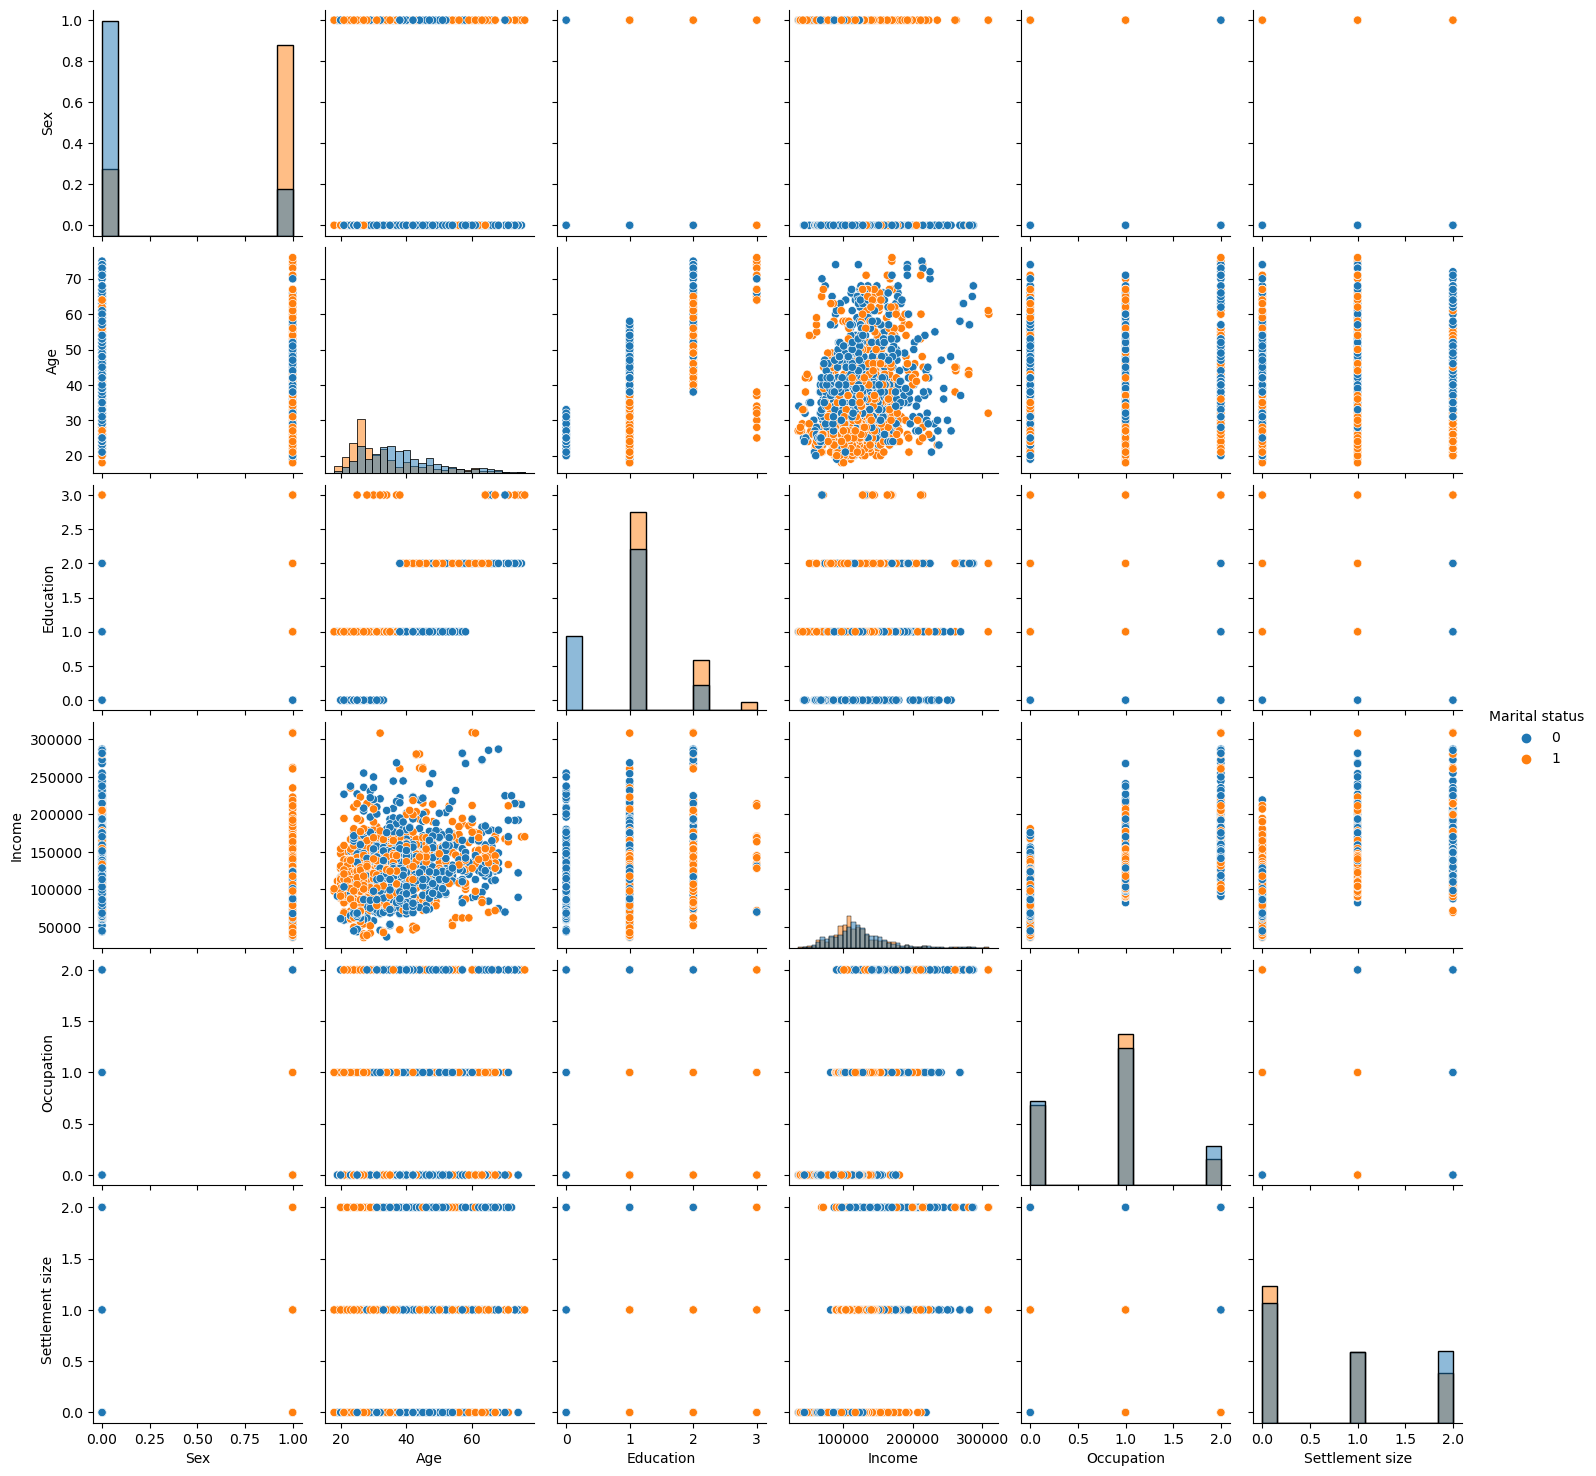

In [13]:
# hue=Marital status
seaborn.pairplot(customer_df, hue='Marital status', palette='tab10', diag_kind='hist')
plt.show()

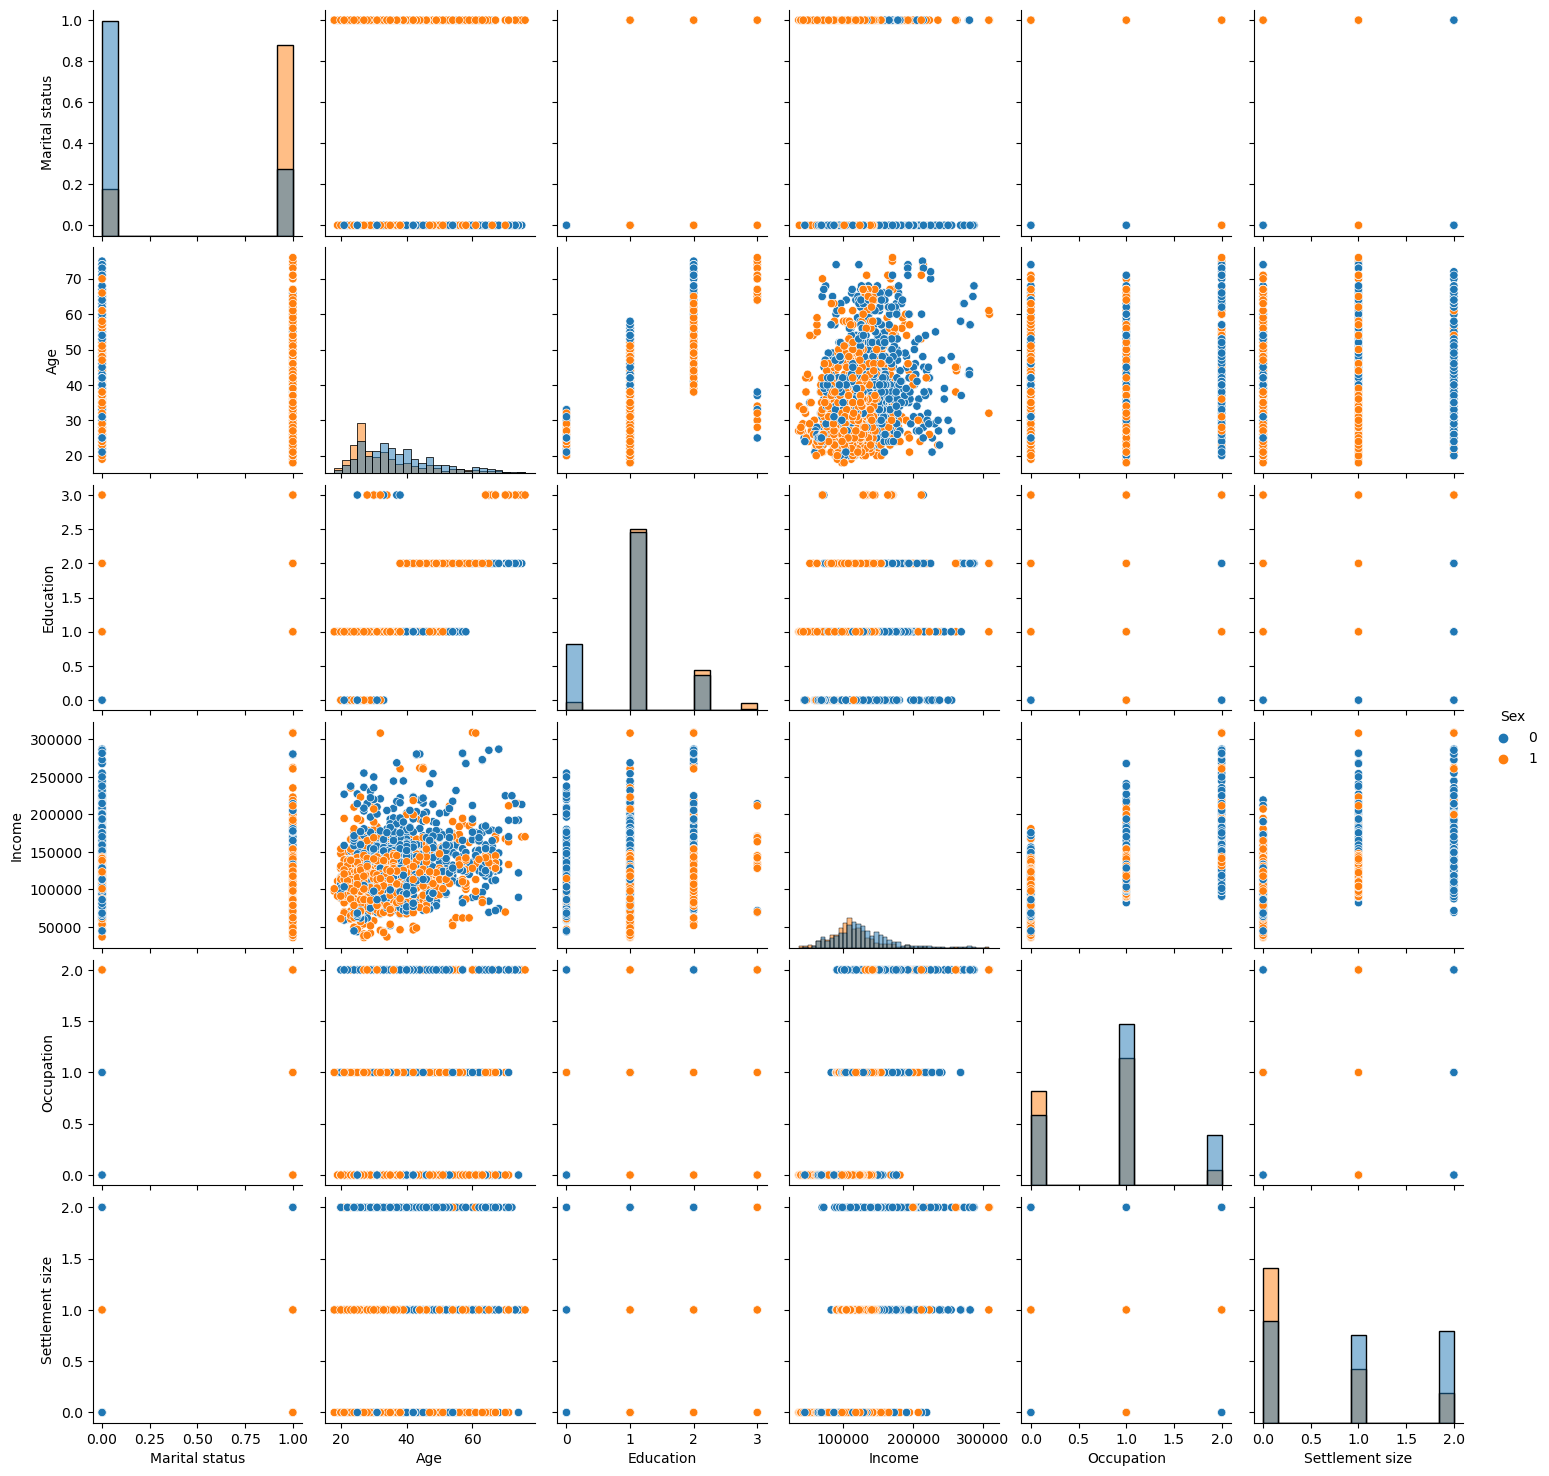

In [14]:
# hue=Sex
seaborn.pairplot(customer_df, hue='Sex', palette='tab10', diag_kind='hist')
plt.show()

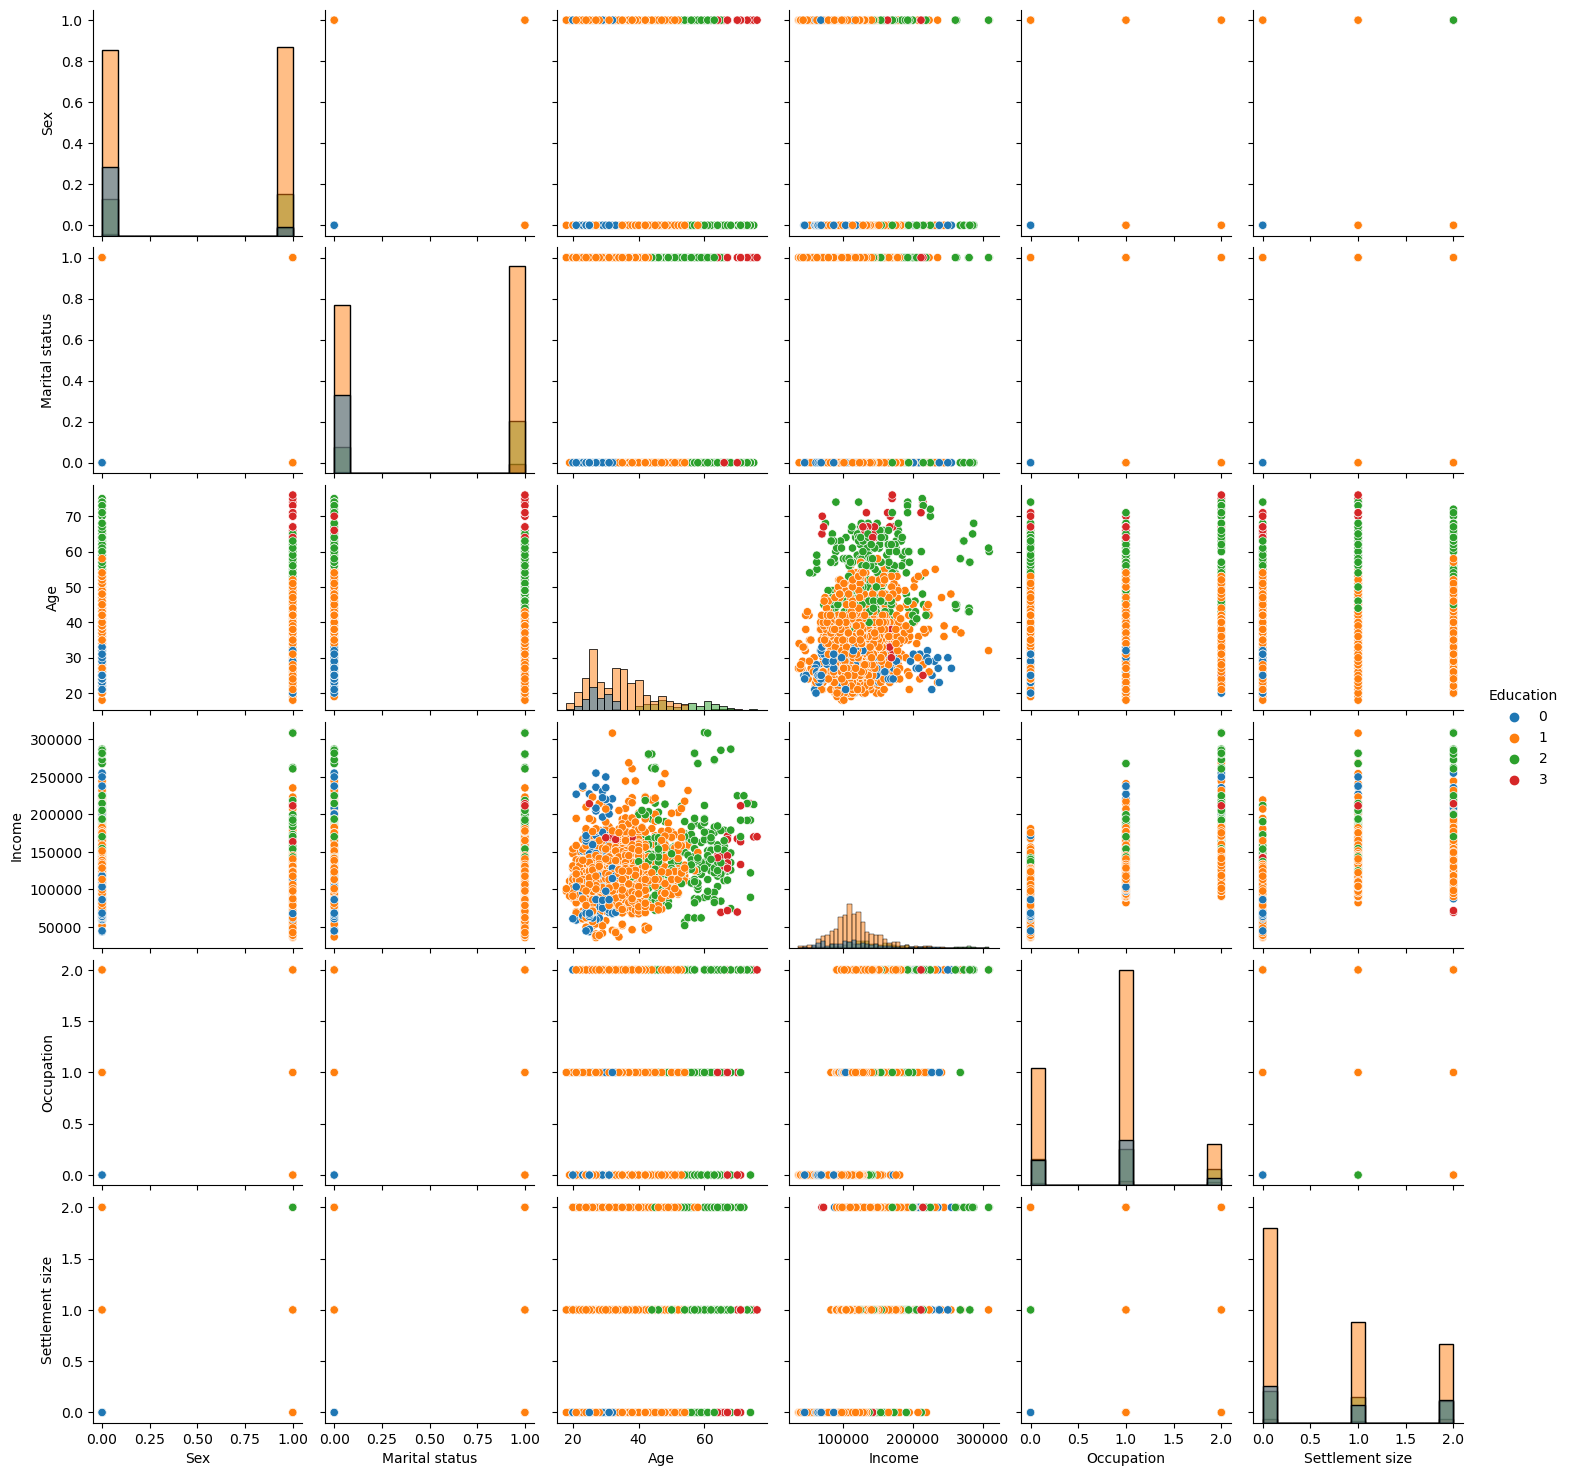

In [15]:
# hue=Education
seaborn.pairplot(customer_df, hue='Education', palette='tab10', diag_kind='hist')
plt.show()

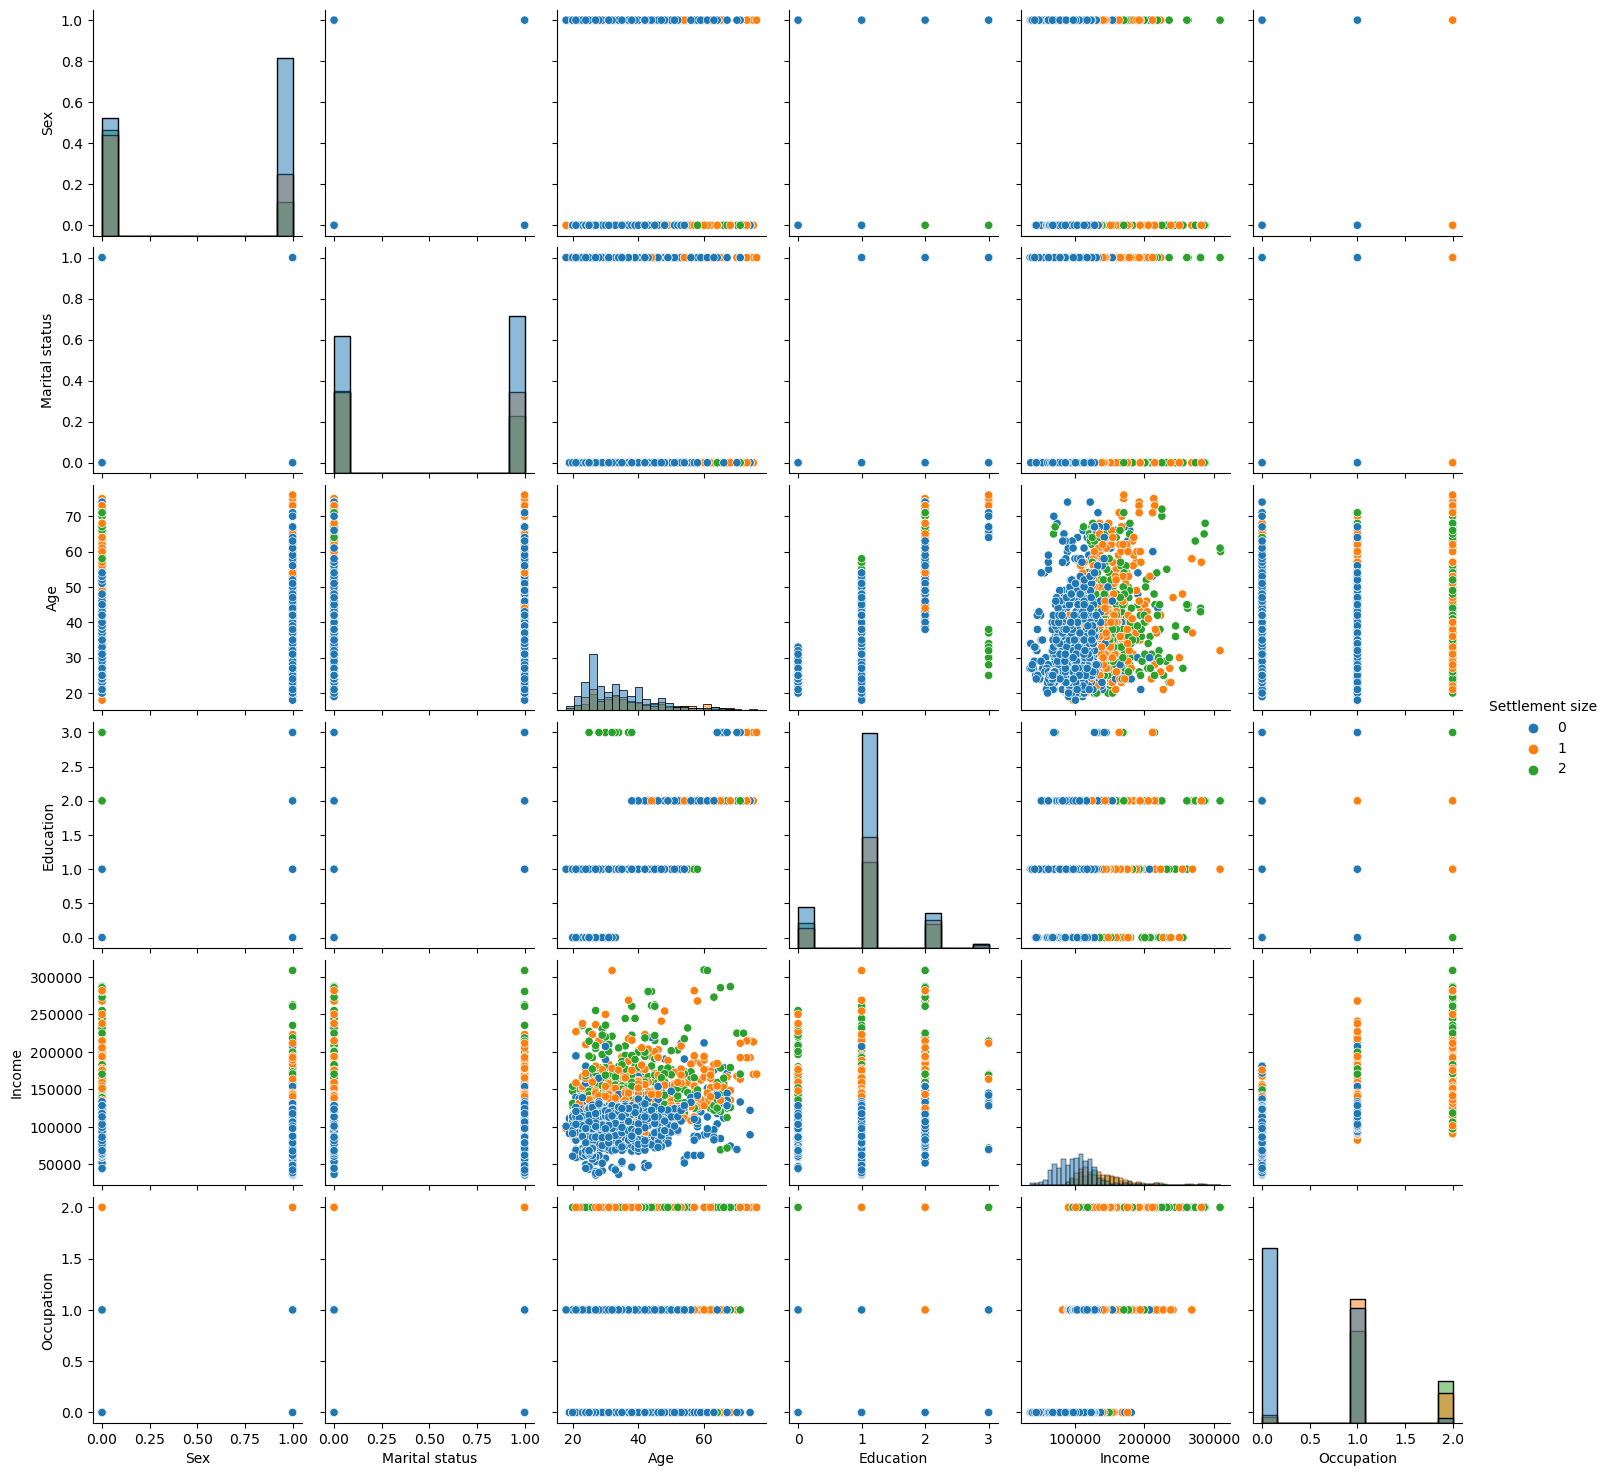

In [16]:
# hue=Settlement size
seaborn.pairplot(customer_df, hue='Settlement size', palette='tab10', diag_kind='hist')
plt.show()

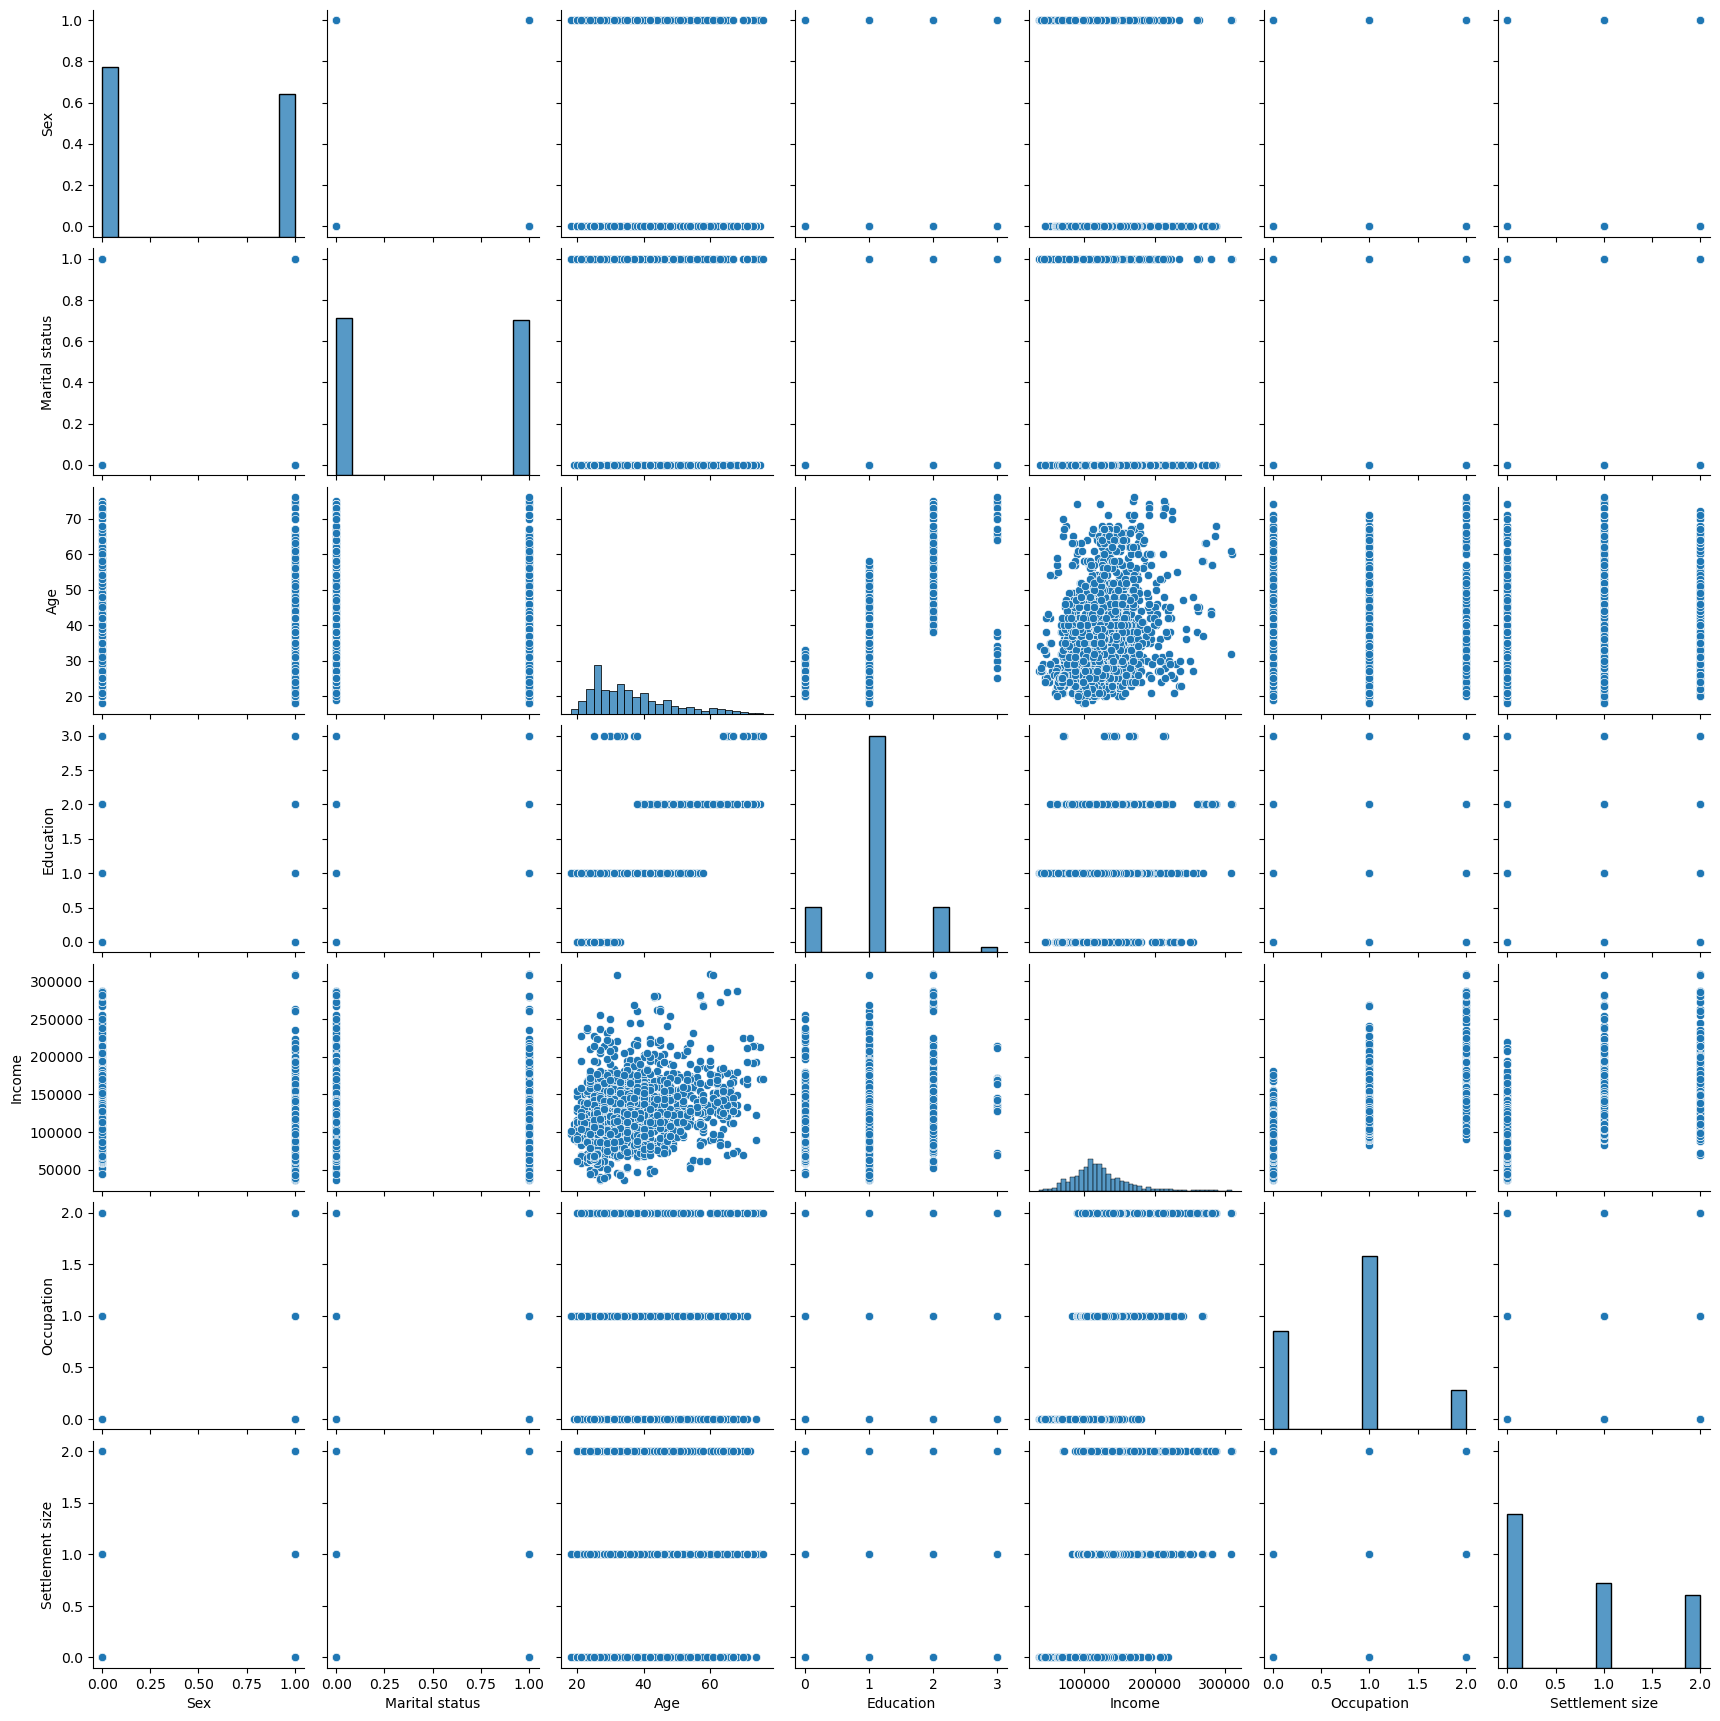

In [18]:
seaborn.pairplot(customer_df, diag_kind='hist')
plt.show()

## 3.1 - Data visualization

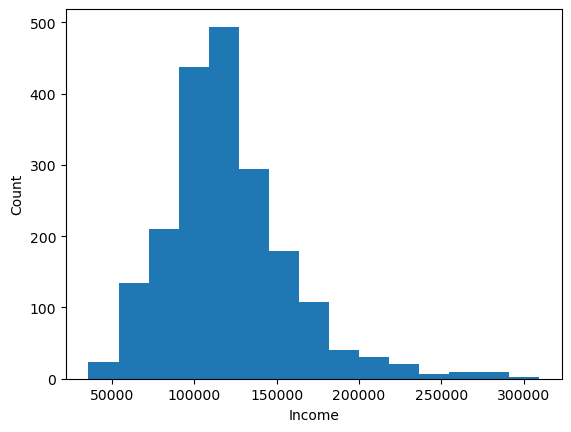

In [34]:
# histogram of income
plt.hist(customer_df['Income'], bins=15)
plt.xlabel('Income')
plt.ylabel('Count')
plt.savefig('Q3_aincome_dist.png')

plt.show()

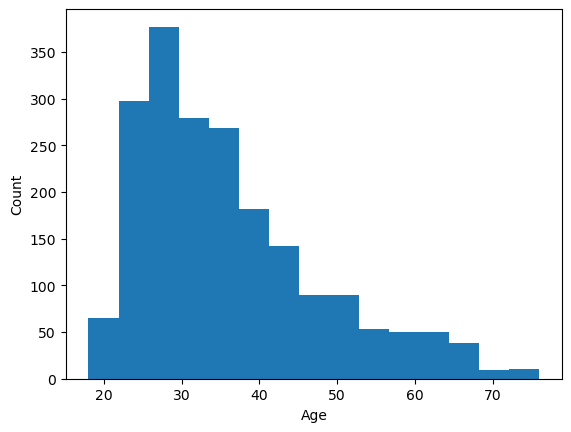

In [33]:
# histogram of age
plt.hist(customer_df['Age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('Q3_age_dist.png')

plt.show()

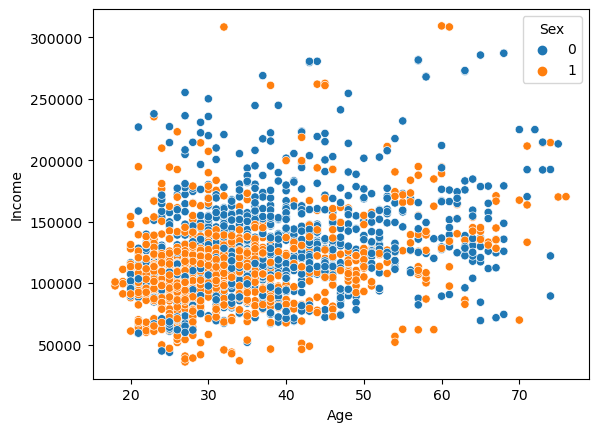

In [37]:
# scatter plot of income vs age with sex as the coloring
scatter_sex = seaborn.scatterplot(x='Age', y='Income', data=customer_df, hue='Sex')
fig_sex = scatter_sex.get_figure()
fig_sex.savefig("Q3_scatter_sex.png") 
plt.show()

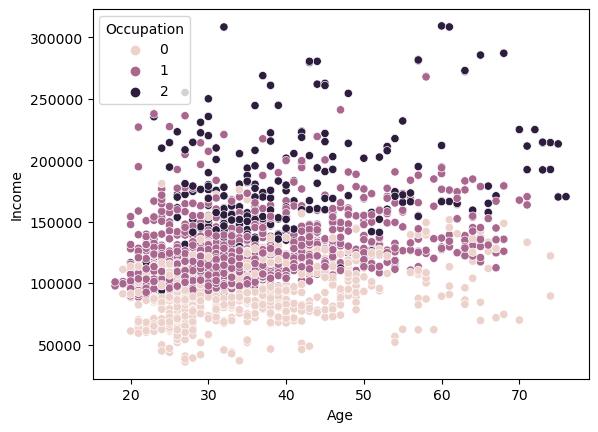

In [39]:
# scatter plot of income vs age with Occupation as the coloring
scatter_occupation = seaborn.scatterplot(x='Age', y='Income', data=customer_df, hue='Occupation')
fig_occupation = scatter_occupation.get_figure()
fig_occupation.savefig("Q3_scatter_occupation.png") 
plt.show()

## 3.3 PCA

In [41]:
# pre processing

In [42]:
# standardize quantitaive features

In [48]:
# cols_for_std = ['Income', 'Age']
# df_std = customer_df.copy()
# scaler = StandardScaler()
# # Overwrite old columns with transformed columns
# df_std[cols_for_std] = scaler.fit_transform(df_std[cols_for_std])

In [177]:
df_std = customer_df.copy()
scaler = StandardScaler()
df_std = scaler.fit_transform(df_std)

In [178]:
df_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [179]:
#df_std_encoded = pd.get_dummies(df_std, columns=['Occupation', 'Settlement size', 'Education'], drop_first=True)

In [180]:
#df_std_encoded

In [181]:
# perform pca with different number of components

In [182]:
num_components = [i for i in range(1, 8)]
pca = PCA()
pca.fit_transform(df_std)
cummulative_var=pca.explained_variance_ratio_

In [183]:
cummulative_var

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

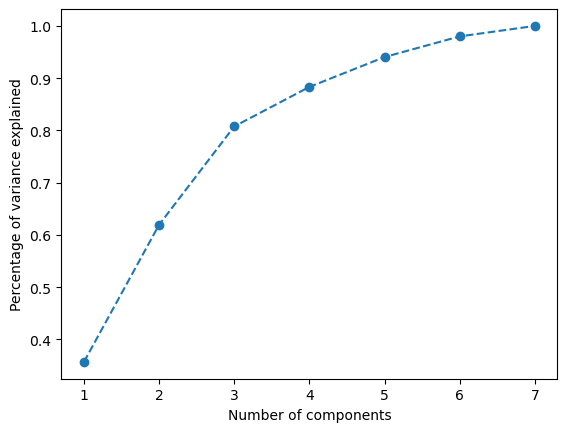

In [184]:
# draw grapg of variance explained vs num components
plt.plot(num_components, cummulative_var.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of components")
plt.ylabel("Percentage of variance explained")
plt.savefig('Q3_pca.png')
plt.show()

In [185]:
# for 3 components
pca = PCA(n_components=3)
pca_score_3 = pca.fit_transform(df_std)
pca_score_3

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## 3.4 - Kmeans

In [186]:
# means of the 3  principal components
pc_1_mean = np.mean([pca_score_3[i][0] for i in range(len(pca_score_3))])
pc_2_mean = np.mean([pca_score_3[i][1] for i in range(len(pca_score_3))])
pc_3_mean = np.mean([pca_score_3[i][2] for i in range(len(pca_score_3))])

In [187]:
print(pc_1_mean)
print(pc_2_mean)
print(pc_3_mean)

2.842170943040401e-17
0.0
0.0


In [188]:
# We consider 25 clusters
WCSS = []
for num_clusters in range(1,26):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_score_3)
    WCSS.append(kmeans.inertia_)

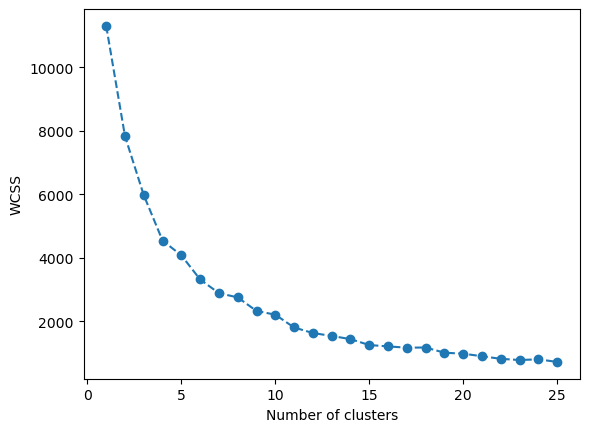

In [189]:
# Make plot to determine optimal number of clusters to use
plt.plot(range(1, 26), WCSS, marker='o', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.savefig('Q3_kmeans_elbow.png')
plt.show()

Thus the choice of 4 clusters results from the elbow method

In [191]:
# kmeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(pca_score_3)

KMeans(n_clusters=4)

## 3.5 PCA and Kmeans results

In [199]:
# construct pca df of clustered data points
df_pca = pd.DataFrame(pca_score_3, columns=['pc_1', 'pc_2', 'pc_3'])
k_means_pca_labels = []
for i in kmeans_4.labels_:
    if i == 0:
        k_means_pca_labels.append(1)
    elif i== 1:
        k_means_pca_labels.append(2)
    elif i == 2:
        k_means_pca_labels.append(3)
    elif i == 3:
        k_means_pca_labels.append(4)
df_pca['Segment K-means PCA'] = k_means_pca_labels

In [200]:
df_pca

,pc_1,pc_2,pc_3,Segment K-means PCA
0,2.514746,0.834122,2.174806,3
1,0.344935,0.598146,-2.211603,2
2,-0.651063,-0.680093,2.280419,1
3,1.714316,-0.579927,0.730731,4
4,1.626745,-0.440496,1.244909,4
...,...,...,...,...
1995,-0.866034,0.298330,1.438958,1
1996,-1.114957,0.794727,-1.079871,2
1997,-1.452298,-2.235937,0.896571,1
1998,-2.241453,0.627108,-0.530456,2


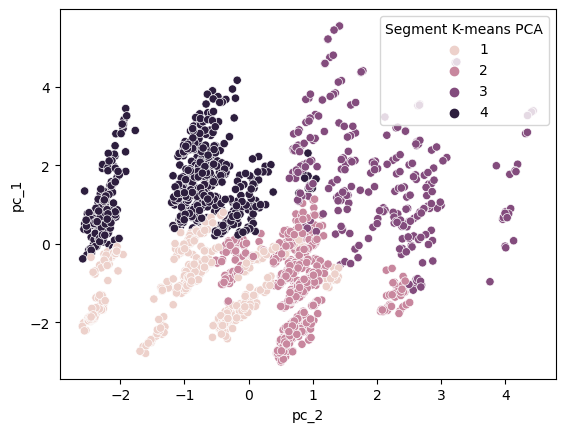

In [202]:
# make sactter plot
scatter_pca_kmeans = seaborn.scatterplot(x='pc_2', y='pc_1', data=df_pca, hue='Segment K-means PCA')
fig_pca_kmeans = scatter_pca_kmeans.get_figure()
fig_pca_kmeans.savefig("Q3_scatter_pca_kmeansn.png") 
plt.show()

## 3.6  - Neural Network

In [315]:
# split data
df_train, df_test = train_test_split(df_pca, test_size=0.2, random_state=42)
X_train = df_train[['pc_1', 'pc_2', 'pc_3']].values
X_test = df_test[['pc_1', 'pc_2', 'pc_3']].values
y_train = df_train['Segment K-means PCA'].values
y_train = np.array([i-1 for i in y_train])
y_train = np_utils.to_categorical(y_train)
y_test = df_test['Segment K-means PCA'].values
y_test = np.array([i-1 for i in y_test])
y_test = np_utils.to_categorical(y_test)

In [317]:
input_shape = [X_train.shape[1]]

In [318]:
input_shape

[3]

In [319]:
# build NN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [320]:
# check model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               512       
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                                 
Total params: 9,028
Trainable params: 9,028
Non-trainable params: 0
_________________________________________________________________


In [321]:
# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [322]:
# add early stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)

In [356]:
# fit the model
losses=model.fit(X_train,
             y_train,
             epochs=50,
             verbose=1,
            validation_data=(X_test,y_test))

Epoch 1/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9969 - val_loss: 0.0060 - val_accuracy: 0.9975
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9975 - val_loss: 0.0095 - val_accuracy: 0.9925
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0045 - val_accuracy: 0.9975
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0063 - val_accuracy: 0.9975
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0081 - val_accuracy: 0.9925
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0056 - val_accuracy: 0.9975
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 8/50
50/50 [==

In [357]:
accuracy = model.evaluate(X_test,  y_test, verbose=2)[1]
accuracy

13/13 - 0s - loss: 0.0061 - accuracy: 0.9950 - 29ms/epoch - 2ms/step


0.9950000047683716

In [358]:
y_pred = model.predict(X_test)
y_pred = to_categorical(np.argmax(y_pred, 1), dtype = "int64")

13/13 [==============================] - 0s 998us/step


In [359]:
f1_score(y_test, y_pred, average='macro')

0.9916943674035402

In [345]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[297,   1],
        [  0, 102]],

       [[250,   1],
        [  0, 149]],

       [[359,   0],
        [  1,  40]],

       [[292,   0],
        [  1, 107]]], dtype=int64)

In [368]:
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.007070,0.996875,0.006015,0.9975
1,0.005659,0.997500,0.009511,0.9925
2,0.003713,0.998750,0.004501,0.9975
3,0.003883,0.998750,0.006278,0.9975
4,0.004673,0.998125,0.008086,0.9925
5,0.003944,0.998750,0.005561,0.9975
6,0.004882,0.998125,0.005975,1.0000
7,0.006042,0.998125,0.006860,0.9950
8,0.004232,0.998125,0.007680,0.9975
9,0.003351,0.998750,0.011437,0.9950


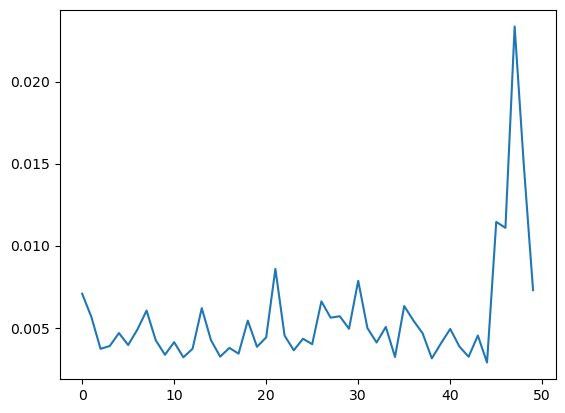

In [374]:
# plot val_loss and val-accuracy
loss = loss_df['loss']
accuracy = loss_df['val_accuracy']
plt.plot(range(0,50), loss)
plt.savefig('NN_loss.png')
plt.show()

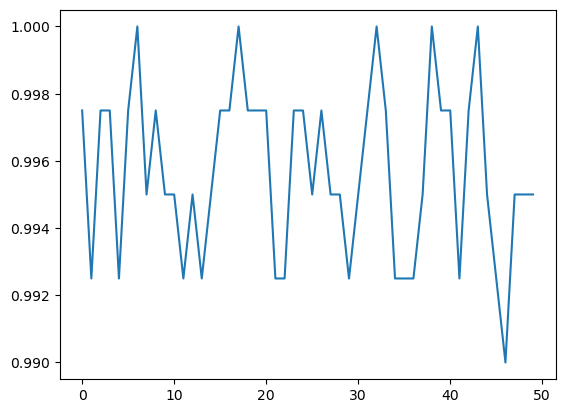

In [375]:
loss = loss_df['loss']
accuracy = loss_df['val_accuracy']
plt.plot(range(0,50), accuracy)
plt.savefig('NN_accuracy.png')
plt.show()

# Question 4 - Decision Trees